In [1]:
#References 
#https://www.kaggle.com/code/teaprint/my-analysis-on-motion-sensor-data
#https://github.com/MadhavShashi/Human-Activity-Recognition-Using-Smartphones-Sensor-DataSet/blob/master/1.HumanActivityRecognition_EDA.ipynb


In [2]:
#importing the common libraries
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Data Files:
Files = glob.glob(r'C:\Users\brije\classify_cowpositions/*_*')
dfa = []
# Activety types dict:
activity_codes = {1:'Eating',2:'Drinking',3:'Walking',4:'Standing',5:'Lying',6:'Rum_Stdng',7:'Rum_Lyng',8:'Grooming',
                  9:'Idle_Other'}        
activity_types = list(activity_codes.keys())

# Load All data:
for j  in Files:
    dfs = pd.read_csv(j)
    # Add Activety label, Subject name and Experiment number
    dfs['Activity'] = dfs['label'].map(activity_codes)
    dfa.append(dfs)     
        
df = pd.concat(dfa,axis=0)
print(df.shape)
print(df.columns)

(12263524, 12)
Index(['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z', 'label', 'Activity'],
      dtype='object')


In [4]:
np.unique(df['label'])

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
#data charecterization 
#missing values
#class imbalance 
#show the first few records of each motion type 

In [6]:
### duplicate values
print('No of duplicates: {}'.format(sum(df.duplicated())))

No of duplicates: 0


In [7]:
### Missing values
print('We have {} NaN/Null values'.format(df.isnull().values.sum()))
checks = pd.isna(df).sum()
print(checks)

We have 0 NaN/Null values
time        0
acc_x       0
acc_y       0
acc_z       0
gyr_x       0
gyr_y       0
gyr_z       0
mag_x       0
mag_y       0
mag_z       0
label       0
Activity    0
dtype: int64


In [8]:
### class balance
df['Activity'].value_counts()

Eating        3405702
Standing      2539806
Rum_Lyng      1928968
Lying         1711687
Rum_Stdng     1703683
Idle_Other     405263
Grooming       368607
Walking        145369
Drinking        54439
Name: Activity, dtype: int64

In [9]:
df['label'].value_counts()

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

(array([  54439., 3405702.,  368607.,  405263., 1711687., 1928968.,
        1703683., 2539806.,  145369.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

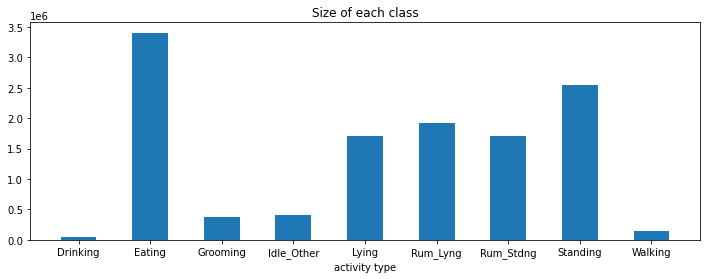

In [10]:
# class_counts = list()
# for act in activity_types[:1]:
#     class_counts.append(df[df['Activity']==activity_codes[act]].count())
plt.figure(1,figsize=(12,4))
plt.title('Size of each class')
plt.xlabel('activity type')
plt.hist(df['Activity'],bins=range(0,10),rwidth=0.5,align='left')

In [11]:
#Find outliers and cap them 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time     229095.000000
acc_x         0.379883
acc_y         0.145508
acc_z         0.168945
gyr_x         5.737305
gyr_y         7.568359
gyr_z         4.150391
mag_x       337.500000
mag_y      1029.000000
mag_z       483.000000
label         5.000000
dtype: float64


In [12]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(6217094, 12)

In [13]:
df.shape

(12263524, 12)

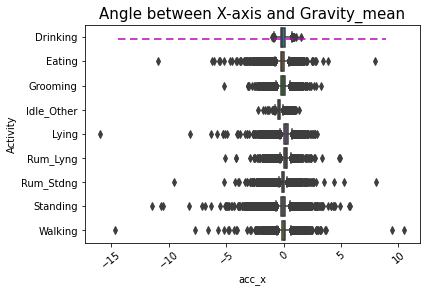

In [15]:
sns.boxplot(x='acc_x', y='Activity', data=df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

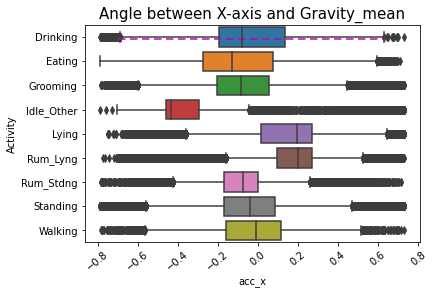

In [16]:
sns.boxplot(x='acc_x', y='Activity', data=df_out)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

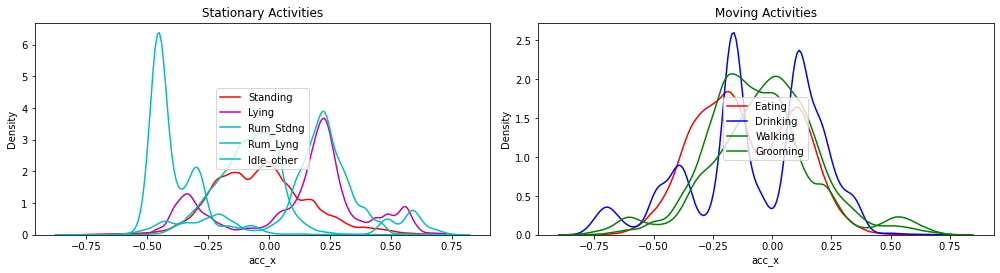

In [46]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = df_out[df_out['label']==1]
df2 = df_out[df_out['label']==2]
df3 = df_out[df_out['label']==3]
df4 = df_out[df_out['label']==4]
df5 = df_out[df_out['label']==5]
df6 = df_out[df_out['label']==6]
df7 = df_out[df_out['label']==7]
df8 = df_out[df_out['label']==8]
df9 = df_out[df_out['label']==9]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df4['acc_x'],color = 'r',hist = False, label = 'Standing')
sns.distplot(df5['acc_x'],color = 'm',hist = False,label = 'Lying')
sns.distplot(df6['acc_x'],color = 'c',hist = False, label = 'Rum_Stdng')
sns.distplot(df7['acc_x'],color = 'c',hist = False, label = 'Rum_Lyng')
sns.distplot(df9['acc_x'],color = 'c',hist = False, label = 'Idle_other')
#plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['acc_x'],color = 'red',hist = False, label = 'Eating')
sns.distplot(df2['acc_x'],color = 'blue',hist = False,label = 'Drinking')
sns.distplot(df3['acc_x'],color = 'green',hist = False, label = 'Walking')
sns.distplot(df8['acc_x'],color = 'green',hist = False, label = 'Grooming')
plt.legend(loc='center')


plt.tight_layout()
plt.show()

In [21]:
#!pip install imbalanced-learn

In [22]:
#!pip install -q imblearn

# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x = df_out.drop(['time','label','Activity'],axis=1)
y = df_out['label']

X, Y = rus.fit_resample(x, y)
#Handling class imbalannce by taking only
#import imblearn
#from imblearn.over_sampling import SMOTE
# Y = df_out.label[df_out.label==2]
# X = df_out.sample(y)
# # X = df_out[df_out['label']==2].drop(['time','label','Activity'],axis=1)
# # Y = df_out.label[df_out.label==2]
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (60849, 9)
Shape of Y: (60849,)


In [24]:
Y.value_counts()

9    6761
8    6761
7    6761
6    6761
5    6761
4    6761
3    6761
2    6761
1    6761
Name: label, dtype: int64

(array([6761., 6761., 6761., 6761., 6761., 6761., 6761., 6761., 6761.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

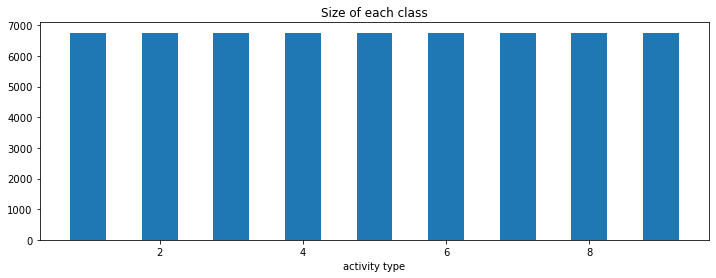

In [25]:
# class_counts = list()
# for act in activity_types[:1]:
#     class_counts.append(df[df['Activity']==activity_codes[act]].count())
plt.figure(1,figsize=(12,4))
plt.title('Size of each class')
plt.xlabel('activity type')
plt.hist(Y,bins=range(1,11),rwidth=0.5,align='left')

In [26]:
# x = df_out.drop(['time','label','Activity'],axis=1)
# y = df_out['label']
# X =x[x['label']==2]
# Y =y[-10000:]
# print('Shape of X:', X.shape)
# print('Shape of Y:', Y.shape)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(X)

array([[0.32936636, 0.54697996, 0.431259  , ..., 0.22135706, 0.71611983,
        0.54586739],
       [0.54133159, 0.60486586, 0.10636752, ..., 0.6974416 , 0.12268188,
        0.82107175],
       [0.23705373, 0.66275176, 0.4884225 , ..., 0.48832036, 0.29743224,
        0.4595822 ],
       ...,
       [0.22579605, 0.2894295 , 0.95513754, ..., 0.39043382, 0.30242511,
        0.46775658],
       [0.21486004, 0.3817115 , 0.73010132, ..., 0.23136819, 0.71398003,
        0.60217984],
       [0.23608875, 0.28859071, 0.9428365 , ..., 0.38042269, 0.29814551,
        0.47229791]])

In [28]:
x_normalized = pd.DataFrame(scaling.fit_transform(x),columns = x.columns)
x_normalized.head(3)

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.612022,0.760067,0.648336,0.836898,0.028340,0.718519,0.363737,0.793252,0.712146
1,0.633237,0.578020,0.643271,0.114973,0.123482,0.903704,0.361513,0.793252,0.707987
2,0.652523,0.649329,0.804631,0.368984,0.265182,0.703704,0.359288,0.787117,0.709651


In [29]:
#select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features       k_score
6    mag_x  86059.617820
0    acc_x  63740.366351
7    mag_y  40574.175679
2    acc_z  33352.052680
8    mag_z  24366.248541
1    acc_y  10397.986455
3    gyr_x    413.112019
4    gyr_y    261.684678
5    gyr_z    168.060824


Text(0.5, 1.0, 'TSNE')

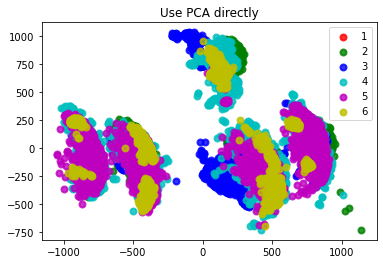

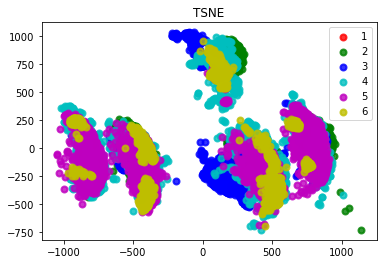

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### dimension reduction
### use pca to reduce the dimension to 2D directly.
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure(1)
colors = ['r','g','b','c','m','y','k']
lw = 2

for color, i, target_name in zip(colors, range(6), activity_types):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Use PCA directly')

### sklearn tsne
# sites.google.com/s/1HAV-HEiBhPHLgdh5Ejmu31TrVIQqw9HU/p/1bPpOCDlxW7i5nOpy3bvpnmkqa8Y-SDVa/edit
# Scale data
scl = StandardScaler()
scaled_X = scl.fit_transform(X)

# Reduce dimensions before feeding into tsne
pca = PCA(n_components=0.9, random_state=3)
pca_transformed = pca.fit_transform(scaled_X)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(pca_transformed)

plt.figure(2)
for color, i, target_name in zip(colors, range(6), activity_types):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE')

In [49]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1")
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 60849 samples in 0.145s...
[t-SNE] Computed neighbors for 60849 samples in 0.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60849
[t-SNE] Computed conditional probabilities for sample 2000 / 60849
[t-SNE] Computed conditional probabilities for sample 3000 / 60849
[t-SNE] Computed conditional probabilities for sample 4000 / 60849
[t-SNE] Computed conditional probabilities for sample 5000 / 60849
[t-SNE] Computed conditional probabilities for sample 6000 / 60849
[t-SNE] Computed conditional probabilities for sample 7000 / 60849
[t-SNE] Computed conditional probabilities for sample 8000 / 60849
[t-SNE] Computed conditional probabilities for sample 9000 / 60849
[t-SNE] Computed conditional probabilities for sample 10000 / 60849
[t-SNE] Computed conditional probabilities for sample 11000 / 60849
[t-SNE] Computed conditional probabilities for sampl

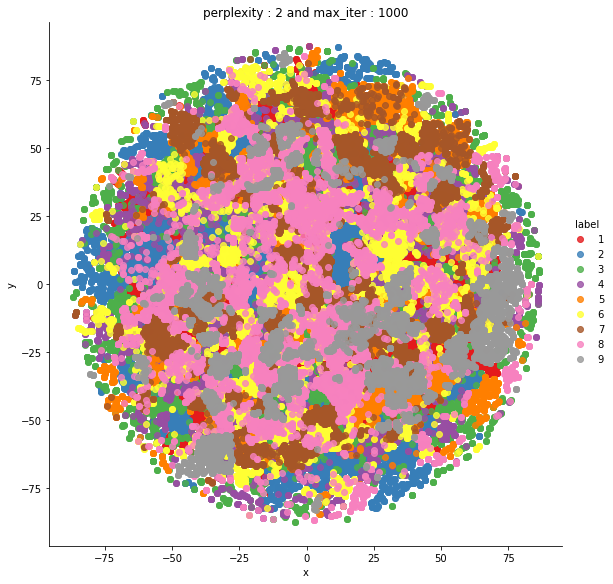

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 60849 samples in 0.123s...
[t-SNE] Computed neighbors for 60849 samples in 0.694s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60849
[t-SNE] Computed conditional probabilities for sample 2000 / 60849
[t-SNE] Computed conditional probabilities for sample 3000 / 60849
[t-SNE] Computed conditional probabilities for sample 4000 / 60849
[t-SNE] Computed conditional probabilities for sample 5000 / 60849
[t-SNE] Computed conditional probabilities for sample 6000 / 60849
[t-SNE] Computed conditional probabilities for sample 7000 / 60849
[t-SNE] Computed conditional probabilities for sample 8000 / 60849
[t-SNE] Computed conditional probabilities for sample 9000 / 60849
[t-SNE] Computed conditional probabilities for sample 10000 / 60849
[t-SNE] Computed conditional probabilities for sample 11000 / 60849
[t-SNE] Computed conditional probabilities for

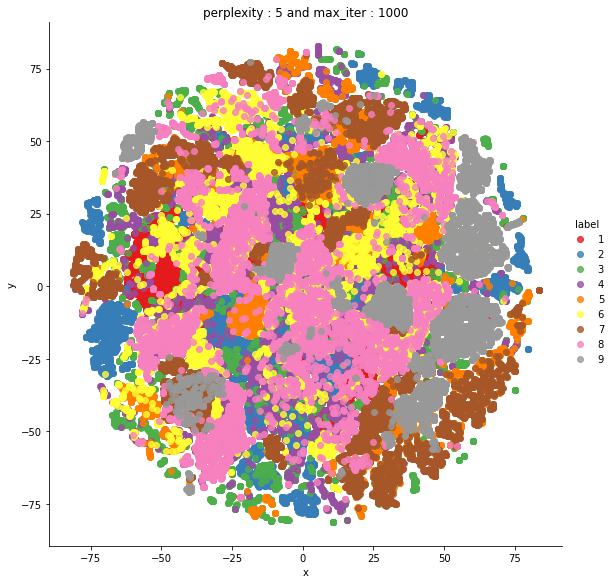

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60849 samples in 0.091s...
[t-SNE] Computed neighbors for 60849 samples in 0.970s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60849
[t-SNE] Computed conditional probabilities for sample 2000 / 60849
[t-SNE] Computed conditional probabilities for sample 3000 / 60849
[t-SNE] Computed conditional probabilities for sample 4000 / 60849
[t-SNE] Computed conditional probabilities for sample 5000 / 60849
[t-SNE] Computed conditional probabilities for sample 6000 / 60849
[t-SNE] Computed conditional probabilities for sample 7000 / 60849
[t-SNE] Computed conditional probabilities for sample 8000 / 60849
[t-SNE] Computed conditional probabilities for sample 9000 / 60849
[t-SNE] Computed conditional probabilities for sample 10000 / 60849
[t-SNE] Computed conditional probabilities for sample 11000 / 60849
[t-SNE] Computed conditional probabilities fo

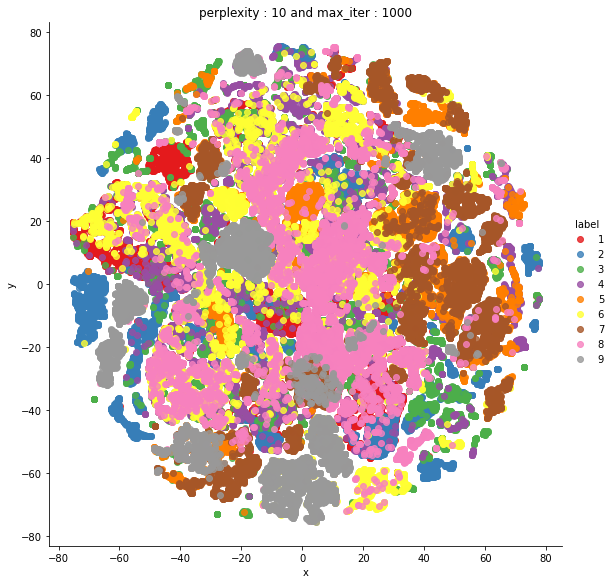

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 60849 samples in 0.100s...
[t-SNE] Computed neighbors for 60849 samples in 1.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60849
[t-SNE] Computed conditional probabilities for sample 2000 / 60849
[t-SNE] Computed conditional probabilities for sample 3000 / 60849
[t-SNE] Computed conditional probabilities for sample 4000 / 60849
[t-SNE] Computed conditional probabilities for sample 5000 / 60849
[t-SNE] Computed conditional probabilities for sample 6000 / 60849
[t-SNE] Computed conditional probabilities for sample 7000 / 60849
[t-SNE] Computed conditional probabilities for sample 8000 / 60849
[t-SNE] Computed conditional probabilities for sample 9000 / 60849
[t-SNE] Computed conditional probabilities for sample 10000 / 60849
[t-SNE] Computed conditional probabilities for sample 11000 / 60849
[t-SNE] Computed conditional probabilities fo

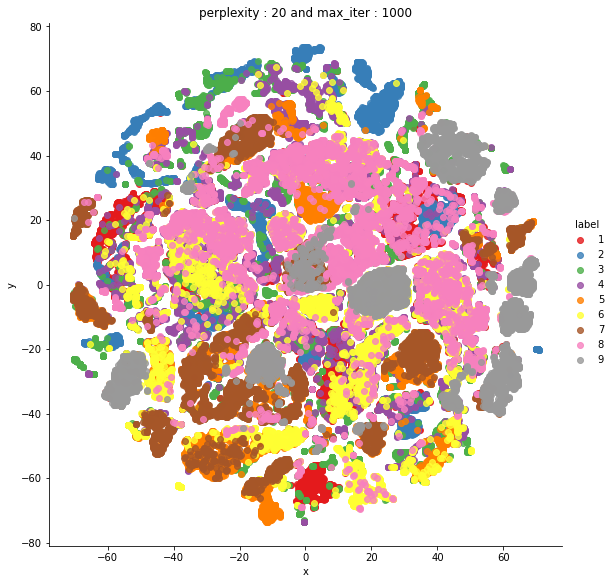

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60849 samples in 0.089s...
[t-SNE] Computed neighbors for 60849 samples in 2.832s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60849
[t-SNE] Computed conditional probabilities for sample 2000 / 60849
[t-SNE] Computed conditional probabilities for sample 3000 / 60849
[t-SNE] Computed conditional probabilities for sample 4000 / 60849
[t-SNE] Computed conditional probabilities for sample 5000 / 60849
[t-SNE] Computed conditional probabilities for sample 6000 / 60849
[t-SNE] Computed conditional probabilities for sample 7000 / 60849
[t-SNE] Computed conditional probabilities for sample 8000 / 60849
[t-SNE] Computed conditional probabilities for sample 9000 / 60849
[t-SNE] Computed conditional probabilities for sample 10000 / 60849
[t-SNE] Computed conditional probabilities for sample 11000 / 60849
[t-SNE] Computed conditional probabilities f

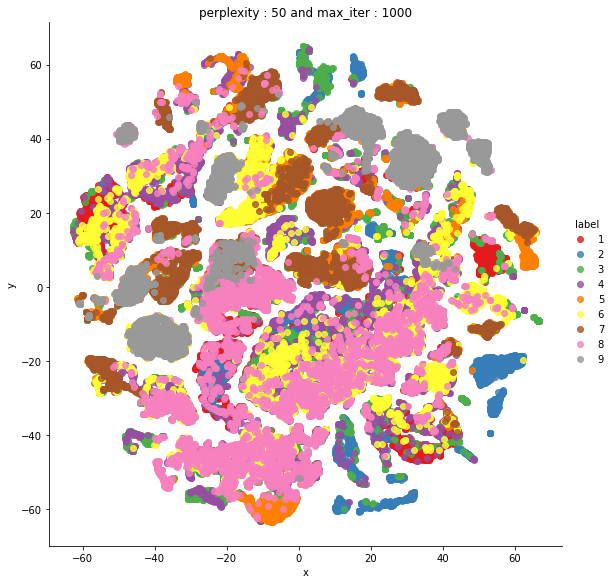

Done


In [50]:
perform_tsne(X_data = X,y_data=Y, perplexities =[2,5,10,20,50])

In [31]:
# X = df_out.drop(['time', 'Activity', 'label'], axis=1)
# Y = df_out.label

In [32]:
from sklearn.model_selection import train_test_split
#Y = to_categorical(Y)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

(60849,)
X_train and y_train : ((42594, 9),(42594,))
X_test  and y_test  : ((18255, 9),(18255,))


In [33]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    


In [35]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

In [36]:
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import itertools

In [51]:
labels=activity_codes.values()
#['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
#print (activity_codes)
print (labels)

dict_values(['Eating', 'Drinking', 'Walking', 'Standing', 'Lying', 'Rum_Stdng', 'Rum_Lyng', 'Grooming', 'Idle_Other'])


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:17.149919

Predicting test data
Done....!

==> testing time:- 0:00:00.008300

==> Accuracy:- 0.2814571350314982


 ********Confusion Matrix********

 [[ 200    9  105  403  144  223  133  561  228]
 [  68  377   48  608   74  180  248  320  131]
 [  77   65   77  396  184  171  315  371  352]
 [  55   13   54  771  113  213  292  374  100]
 [   1  178    2   27  189   30  504  377  705]
 [  52   25   59  570  223  216  180  367  341]
 [   5  123   19   89  192    1 1014  319  328]
 [ 123   15   59  469   66  132  184  871   78]
 [   0  200    1   17   19   67  272   70 1423]]


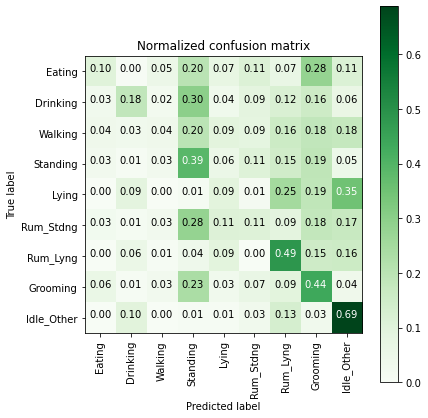

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.34      0.10      0.15      2006
           2       0.38      0.18      0.25      2054
           3       0.18      0.04      0.06      2008
           4       0.23      0.39      0.29      1985
           5       0.16      0.09      0.12      2013
           6       0.18      0.11      0.13      2033
           7       0.32      0.49      0.39      2090
           8       0.24      0.44      0.31      1997
           9       0.39      0.69      0.49      2069

    accuracy                           0.28     18255
   macro avg       0.27      0.28      0.24     18255
weighted avg       0.27      0.28      0.25     18255



==> Best Estimator:
	LogisticRegression(C=0.01)


==> Best parameters:
	Parameters of best estimator : {'C': 0.01, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cr

In [52]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

#1. Logistic Regression with Grid Search
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:07:40.642194

Predicting test data
Done....!

==> testing time:- 0:00:00.004767

==> Accuracy:- 0.16680361544782252


 ********Confusion Matrix********

 [[  11  414    3  391    0  870    0  299   18]
 [   0  541    0  328    0  960    0  115  110]
 [   2  572    2  272    0  935    0  188   37]
 [   0  825    0  424    0  620    0  101   15]
 [   0  114    0  425    0 1398    0   76    0]
 [   0  670    0  258    0  997    1  107    0]
 [   0  153    0  893    0  827    0  217    0]
 [   0  574    0  116    0  832    0  447   28]
 [   0   72    0  174    0 1130    0   70  623]]


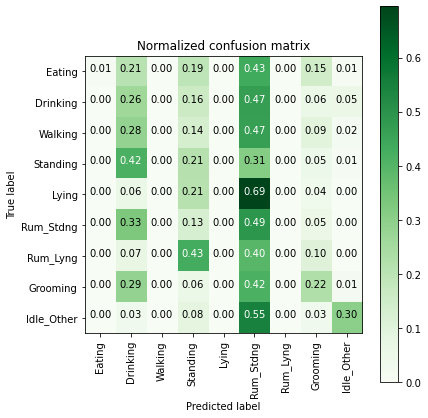

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.85      0.01      0.01      2006
           2       0.14      0.26      0.18      2054
           3       0.40      0.00      0.00      2008
           4       0.13      0.21      0.16      1985
           5       0.00      0.00      0.00      2013
           6       0.12      0.49      0.19      2033
           7       0.00      0.00      0.00      2090
           8       0.28      0.22      0.25      1997
           9       0.75      0.30      0.43      2069

    accuracy                           0.17     18255
   macro avg       0.29      0.17      0.14     18255
weighted avg       0.29      0.17      0.14     18255



==> Best Estimator:
	LinearSVC(C=8, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 8}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores o

In [53]:
#2. Linear SVC with GridSearch
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

training the model..
Done....!

==> training time:- 1:34:35.776506

Predicting test data
Done....!

==> testing time:- 0:01:29.072909

==> Accuracy:- 0.710818953711312


 ********Confusion Matrix********

 [[1522   41  104  152    1   76    8  100    2]
 [ 182 1758   54   36    0    6    0   17    1]
 [ 250   40 1466  111   14   51    6   63    7]
 [ 330   31  123  956   50  249   12  229    5]
 [  96    2   40   52 1506   52  197   10   58]
 [ 215    5   82  342   62 1098    4  193   32]
 [  98    0   19   15  235   10 1675   19   19]
 [ 263   12  106  291   17  217   12 1073    6]
 [  34    0   13    7   49   11   30    3 1922]]


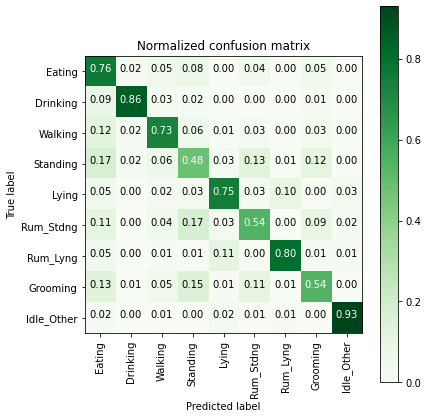

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.51      0.76      0.61      2006
           2       0.93      0.86      0.89      2054
           3       0.73      0.73      0.73      2008
           4       0.49      0.48      0.48      1985
           5       0.78      0.75      0.76      2013
           6       0.62      0.54      0.58      2033
           7       0.86      0.80      0.83      2090
           8       0.63      0.54      0.58      1997
           9       0.94      0.93      0.93      2069

    accuracy                           0.71     18255
   macro avg       0.72      0.71      0.71     18255
weighted avg       0.72      0.71      0.71     18255



==> Best Estimator:
	SVC(C=2, gamma=0.0078125)


==> Best parameters:
	Parameters of best estimator : {'C': 2, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cro

In [54]:
#3. Kernel SVM with GridSearch
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

training the model..
Done....!

==> training time:- 0:00:07.023653

Predicting test data
Done....!

==> testing time:- 0:00:00

==> Accuracy:- 0.6294165981922761


 ********Confusion Matrix********

 [[1412  104   59   58   11  152   25  162   23]
 [ 126 1864   30   16    2    5    3    8    0]
 [ 322  138  874  175   50  100   81  245   23]
 [ 506   74  153  511   42  322   78  286   13]
 [   8   24   27   69 1300   85  406   66   28]
 [ 567   13   82  215   42  722   20  369    3]
 [   6   10   17   91  145   27 1750   33   11]
 [ 297   26   57  135   23  266   68 1103   22]
 [  16    4    9   19   11    7   32   17 1954]]


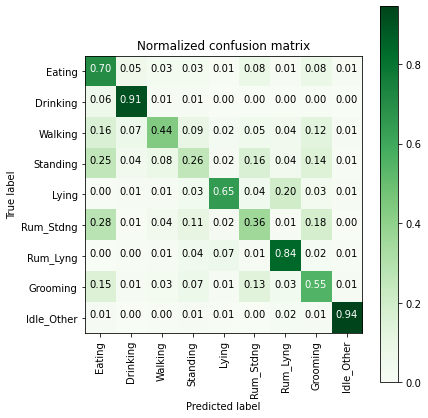

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.43      0.70      0.54      2006
           2       0.83      0.91      0.86      2054
           3       0.67      0.44      0.53      2008
           4       0.40      0.26      0.31      1985
           5       0.80      0.65      0.71      2013
           6       0.43      0.36      0.39      2033
           7       0.71      0.84      0.77      2090
           8       0.48      0.55      0.51      1997
           9       0.94      0.94      0.94      2069

    accuracy                           0.63     18255
   macro avg       0.63      0.63      0.62     18255
weighted avg       0.63      0.63      0.62     18255



==> Best Estimator:
	DecisionTreeClassifier(max_depth=9)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross

In [55]:
#4. Decision Trees with GridSearchCV
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done....!

==> training time:- 0:03:51.962098

Predicting test data
Done....!

==> testing time:- 0:00:00.446012

==> Accuracy:- 0.8074500136948781


 ********Confusion Matrix********

 [[1678   40   45   60    1   72   13   93    4]
 [  25 2002   19    2    0    4    1    0    1]
 [ 102   61 1594   49    4   85   25   84    4]
 [ 153   45   57  960   21  487   41  216    5]
 [   2    1   24   27 1673   41  209   10   26]
 [  97    8   34  152    9 1538    4  190    1]
 [   3    0    3   11  120    4 1933    9    7]
 [ 128   13   50  105    9  314   30 1345    3]
 [   2    0    4    3   13    6   20    4 2017]]


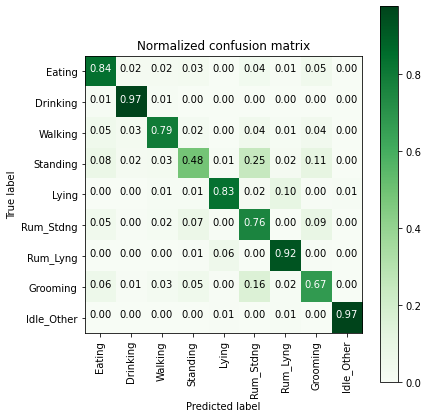

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.77      0.84      0.80      2006
           2       0.92      0.97      0.95      2054
           3       0.87      0.79      0.83      2008
           4       0.70      0.48      0.57      1985
           5       0.90      0.83      0.87      2013
           6       0.60      0.76      0.67      2033
           7       0.85      0.92      0.89      2090
           8       0.69      0.67      0.68      1997
           9       0.98      0.97      0.98      2069

    accuracy                           0.81     18255
   macro avg       0.81      0.81      0.80     18255
weighted avg       0.81      0.81      0.80     18255



==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total numbre of cross validatio

In [56]:
#5. Random Forest Classifier with GridSearch
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

In [57]:
#7. Comparing all models
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 28.15%       71.85%
Linear SVC          : 16.68%       83.32% 
rbf SVM classifier  : 71.08%      28.92% 
DecisionTree        : 62.94%      37.06% 
Random Forest       : 80.75%      19.25% 
